Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 128 x 128.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,0.2,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
5 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.125, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.375, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.026346445083618164
solve_kpoint (0,0,0):
freqs:, k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4
Solving for bands 3 to 4

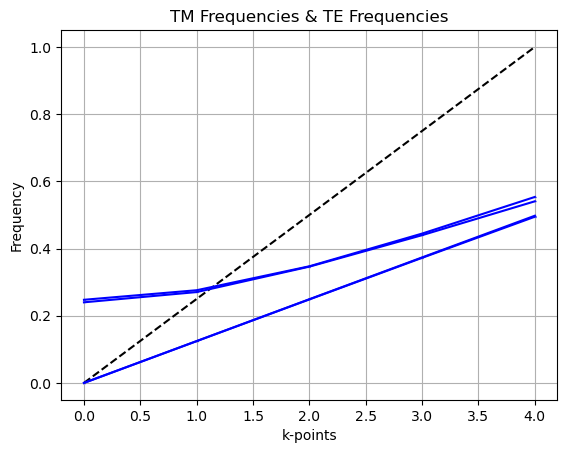

[-1.000000037393976,
 0.9999999995826289,
 -1.0000005857480445,
 0.9999997882069223]

In [1]:
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import numpy as np

num_bands = 4
resolution = 32
n_lo =1.99

geometry_lattice = mp.Lattice(size=mp.Vector3(0,4,4),
                              basis1=mp.Vector3(1, 0))  # 1d cell

k_points = [mp.Vector3(kx) for kx in np.linspace(0, 0.5, 5)]
default_material = mp.Medium(index=1)
geometry =[ mp.Block(
    size=mp.Vector3(mp.inf, 0.2,0.5),
    center=mp.Vector3(),
    material=mp.Medium(index=n_lo),
)]

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
    default_material= default_material
)

ms.run()

t_frqs = ms.all_freqs
gaps = ms.gap_list


fig, ax = plt.subplots(1, 1)

for i, tmz, in zip(range(len(t_frqs)), t_frqs):
    ax.scatter([i] * len(tmz), tmz, color="blue", s=0.2, label="TM")
    
# Calculate and plot the light line
kx_vals = np.linspace(0, 1, len(k_points))
light_line = np.abs(kx_vals)  # Normalized units, slope = 1
ax.plot(range(len(k_points)), light_line, 'k--', label="Light Line")
ax.plot(t_frqs, color="blue", label="TM")

ax.set_xlabel("k-points")
ax.set_ylabel("Frequency")
ax.set_title("TM Frequencies & TE Frequencies")

for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(range(len(k_points)), gap[1], gap[2], color="blue", alpha=0.5)
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(range(len(k_points)), gap[1], gap[2], color="green", alpha=0.5)
ax.grid(True)

plt.show()
ms.compute_zparities()



In [2]:
ms.compute_yparities()

[0.9999999403584142,
 -1.0000000778400218,
 0.9999991749819979,
 1.0000186107587954]

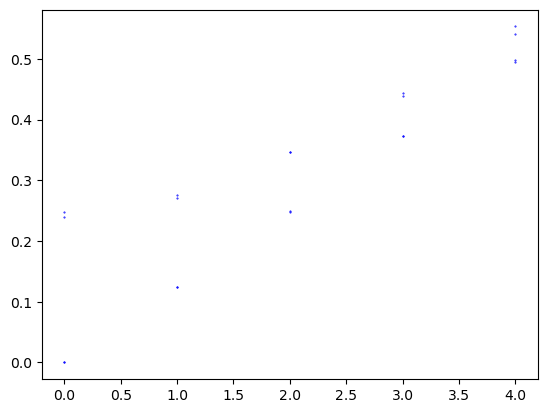

In [3]:
fig, ax = plt.subplots(1, 1)
for i, tmz, in zip(range(len(t_frqs)), t_frqs):
    ax.scatter([i] * len(tmz), tmz, color="blue", s=0.2, label="TM")

plt.show()

In [4]:
print(t_frqs)

[[0.         0.         0.23990685 0.24743187]
 [0.12435851 0.12459981 0.27040728 0.27587519]
 [0.24856219 0.24914424 0.34612852 0.34715763]
 [0.37230688 0.37354989 0.43974472 0.44449671]
 [0.49460123 0.49764331 0.54053866 0.55350264]]


In [5]:
eps11=ms.get_epsilon()

epsilon: 1-3.9601, mean 1.0185, harm. mean 1.00517, 0.726318% > 1, 0.625% "fill"


In [6]:
eps11.shape

(128, 128)

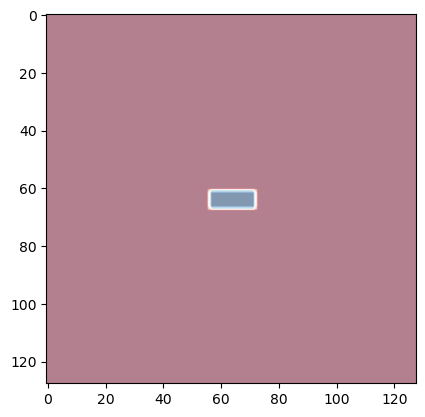

In [24]:
plt.imshow(eps11, cmap='RdBu', alpha=0.5)
plt.show()

In [11]:
s = mpb.output_efield(ms,2)

Outputting fields to e.k05.b02.h5...


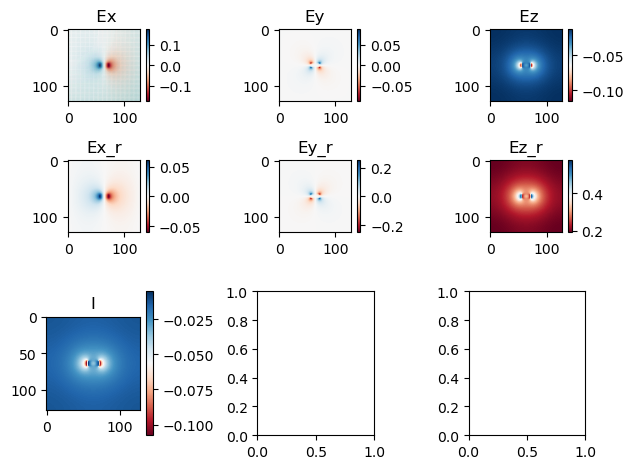

In [60]:
import h5py

with h5py.File('e.k05.b01.h5', 'r') as file:
    data0 = file['x.i'][:]
    data1 = file['x.r'][:]
    data2 = file['y.i'][:]
    data3 = file['y.r'][:]
    data4 = file['z.i'][:]
    data5 = file['z.r'][:]
Ex_i = data0[:128]
Ex_r = data1[:128]
Ey_i = data2[:128]
Ey_r = data3[:128]
Ez_i = data4[:128]
Ez_r = data5[:128]
# subset_data = np.array([Ex_i, Ex_r, Ey_i, Ey_r, Ez_i, Ez_r])
# print(subset_data)
I = Ex_i*Ex_r + Ey_i*Ey_r + Ez_i*Ez_r
fig, ax = plt.subplots(3, 3, gridspec_kw={ 'height_ratios': [1, 1, 2]})
im1 = ax[0, 0].imshow(Ex_i , cmap='RdBu')
ax[0, 0].set_title(' Ex')
x, y = np.meshgrid(np.linspace(0, 1, 128), np.linspace(0, 1, 128))
ax[0, 0].quiver(x, y,Ex_i, color='r')
fig.colorbar(im1, ax=ax[0, 0])

im2 = ax[0, 1].imshow(Ey_i , cmap='RdBu')
ax[0, 1].set_title('Ey')
fig.colorbar(im2, ax=ax[0, 1])

im3 = ax[0, 2].imshow(Ez_i * Ez_r, cmap='RdBu')
ax[0, 2].set_title(' Ez')
fig.colorbar(im3, ax=ax[0, 2])

im5 = ax[1, 0].imshow(Ex_r, cmap='RdBu')
ax[1, 0].set_title('Ex_r')
fig.colorbar(im5, ax=ax[1, 0])

im6 = ax[1, 1].imshow(Ey_r, cmap='RdBu')
ax[1, 1].set_title('Ey_r')
fig.colorbar(im6, ax=ax[1, 1])

im7 = ax[1, 2].imshow(Ez_r, cmap='RdBu')
ax[1, 2].set_title('Ez_r')
fig.colorbar(im7, ax=ax[1, 2])

im4 = ax[2, 0].imshow(I, cmap='RdBu')
ax[2, 0].set_title('I')
fig.colorbar(im4, ax=ax[2, 0])

plt.tight_layout()

plt.show()

In [62]:
py =mpb.output_poynting(ms, 1)

Outputting fields to flux.v.k05.b01.h5...


In [55]:
mpb.output_tot_pwr(ms,1)

D-energy-components:, 5, 1, 0.0126787, 0.00424713, 0.983074
B-energy-components:, 5, 1, 0.0113424, 0.988418, 0.000239252
Outputting tot.rpwr.k05.b01.h5...


In [57]:
mpb.display_group_velocities(ms)

velocity:, 5, Vector3<0.9654368960337321, -6.412310511711334e-08, 7.102432739684486e-08>, Vector3<0.990610060862137, -1.3986917483900134e-07, 2.742754316547955e-09>, Vector3<0.8188843189529339, -4.6327724244042564e-07, 2.829276470516386e-07>, Vector3<0.897963400314492, 7.5693088338865765e-06, -7.927206915883285e-08>


In [58]:
ms.compute_group_velocities()

[Vector3<0.9654368960337321, -6.412310511711334e-08, 7.102432739684486e-08>,
 Vector3<0.990610060862137, -1.3986917483900134e-07, 2.742754316547955e-09>,
 Vector3<0.8188843189529339, -4.6327724244042564e-07, 2.829276470516386e-07>,
 Vector3<0.897963400314492, 7.5693088338865765e-06, -7.927206915883285e-08>]